In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("resources/rated_bond_funds.csv")
df.head()

,Name,Ticker,Category,Analyst Rating,Recommend,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,Columbia Floating Rate Inst,CFRZX,US Fund Bank Loan,Neutral,0,9,66.0,4.0,41.0,44.0,...,96.0,7.0,67.0,48.0,41.0,17.0,57.0,71.0,76.0,45.0
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,US Fund Bank Loan,Bronze,1,19,25.0,5.0,19.0,82.0,...,27.0,40.0,39.0,46.0,27.0,52.0,22.0,35.0,35.0,10.0
2,Delaware Floating Rate Instl,DDFLX,US Fund Bank Loan,Neutral,0,9,24.0,2.0,78.0,32.0,...,7.0,97.0,42.0,26.0,100.0,19.0,12.0,15.0,50.0,50.0
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,US Fund Bank Loan,Bronze,1,19,55.0,5.0,33.0,64.0,...,47.0,70.0,44.0,63.0,18.0,22.0,15.0,56.0,82.0,15.0
4,Eaton Vance Floating-Rate Advantage I,EIFAX,US Fund Bank Loan,Bronze,1,11,95.0,5.0,5.0,84.0,...,67.0,30.0,48.0,78.0,9.0,1.0,1.0,90.0,94.0,1.0


In [3]:
target = df["Recommend"]
target_names = ["sell", "buy"]

In [4]:
data = df.drop(["Name", "Ticker", "Category", "Analyst Rating","Recommend"], axis=1)
feature_names = data.columns
data.head()

,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,Est Fund-Level Net Flow 3 Yr Rank,Est Fund-Level Net Flow 5 Yr Rank,Flows % 1 Yr Rank,Longest Manager Tenure Rank,Average Manager Tenure Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,9,66.0,4.0,41.0,44.0,24.0,53.0,30.0,47,61,...,96.0,7.0,67.0,48.0,41.0,17.0,57.0,71.0,76.0,45.0
1,19,25.0,5.0,19.0,82.0,49.0,14.0,70.0,10,19,...,27.0,40.0,39.0,46.0,27.0,52.0,22.0,35.0,35.0,10.0
2,9,24.0,2.0,78.0,32.0,71.0,61.0,73.0,44,42,...,7.0,97.0,42.0,26.0,100.0,19.0,12.0,15.0,50.0,50.0
3,19,55.0,5.0,33.0,64.0,37.0,72.0,56.0,4,16,...,47.0,70.0,44.0,63.0,18.0,22.0,15.0,56.0,82.0,15.0
4,11,95.0,5.0,5.0,84.0,2.0,20.0,35.0,1,5,...,67.0,30.0,48.0,78.0,9.0,1.0,1.0,90.0,94.0,1.0


In [5]:
# Scale the data
from sklearn import preprocessing

# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
scaled_data = minmax_scale.fit_transform(data)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, random_state=42)

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)
lr_model.score(X_test, y_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7027027027027027

In [8]:
# Predict
predictions = lr_model.predict(X_test)
lr_results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
lr_results.head(10)

,Prediction,Actual
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,1
7,1,0
8,0,0
9,0,0


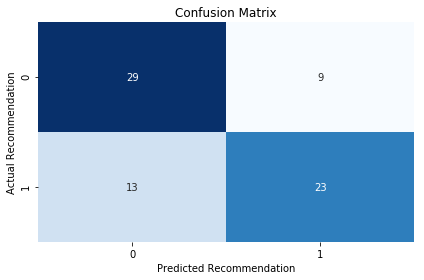

In [14]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

recommendations = [0, 1]

matrix = confusion_matrix(y_test, predictions, labels=recommendations)

# Create pandas dataframe
matrix_df = pd.DataFrame(matrix, columns=recommendations, index=recommendations)

# Create heatmap
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Recommendation"), plt.xlabel("Predicted Recommendation")

plt.tight_layout()
plt.savefig("images/lr_confusion_matrix.png")
plt.show()

In [10]:
# Multiclass logistic regression
target_multi = df["Analyst Rating"]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(scaled_data, target_multi, random_state=42)

lrm = LogisticRegression(random_state=0, multi_class="ovr")
lrm_model = lrm.fit(X_train_m, y_train_m)
lrm_model.score(X_test_m, y_test_m)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4864864864864865

In [11]:
# Predict
predictions_lrm = lrm_model.predict(X_test_m)
lrm_results = pd.DataFrame({"Prediction": predictions_lrm, "Actual": y_test_m}).reset_index(drop=True)
lrm_results.head(10)

,Prediction,Actual
0,Bronze,Bronze
1,Neutral,Bronze
2,Neutral,Neutral
3,Silver,Silver
4,Silver,Gold
5,Neutral,Neutral
6,Neutral,Bronze
7,Neutral,Neutral
8,Neutral,Neutral
9,Neutral,Neutral


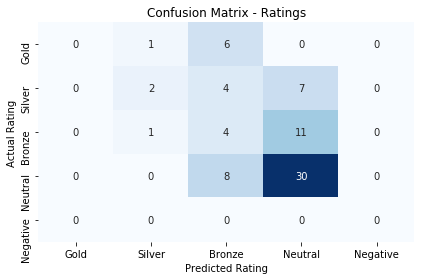

In [17]:
# Create confusion matrix
ratings_names = ["Gold", "Silver", "Bronze", "Neutral", "Negative"]
matrix = confusion_matrix(y_test_m, predictions_lrm, labels=ratings_names)

# Create pandas dataframe
matrix_df = pd.DataFrame(matrix, columns=ratings_names, index=ratings_names)

# Create heatmap
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix - Ratings"), plt.tight_layout()
plt.ylabel("Actual Rating"), plt.xlabel("Predicted Rating")

plt.tight_layout()
plt.savefig("images/lrm_confusion_matrix.png")
plt.show()

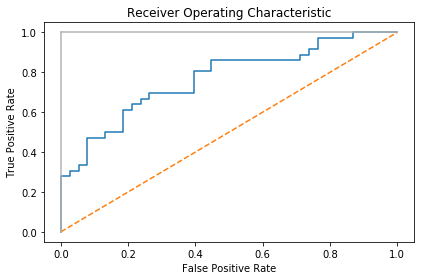

In [16]:
# Receiving Operating Characteristic Curve
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score

# Create feature matrix and target vector
scaled_data, target = make_classification(n_samples=1000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# Get predicted probabilities
target_probabilities = lr_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
                                                               target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.tight_layout()
plt.savefig("images/lr_roc.png")
plt.show()